# Price Elasticity of Demand & Revenue Optimization

## Setup


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv('/content/drive/My Drive/path_to_your_env_file/.env')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


In [ ]:
print(sales_df.head())

  product_id store_id      date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  02/01/17    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  02/01/17    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  02/01/17    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  02/01/17    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  02/01/17    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          NaN               NaN   

   promo_discount_type_2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  


## Price Elasticity for Each Product


In [ ]:
sales_df['date'] = pd.to_datetime(sales_df['date'])
print(sales_df.head())
print(sales_df.info())


  product_id store_id       date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002 2017-02-01    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012 2017-02-01    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013 2017-02-01    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023 2017-02-01    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025 2017-02-01    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          NaN               NaN   

   promo_discount_type_2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    Na

<ipython-input-7-259e7ecafec3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df['date'] = pd.to_datetime(sales_df['date'])


In [ ]:
sales_df['week'] = sales_df['date'].dt.isocalendar().week

In [ ]:
weekly_sales = sales_df.groupby(["product_id", "week"]).agg({
    "sales": "sum",
    "price": "mean"
}).reset_index()

In [ ]:
import numpy as np
import pandas as pd

elasticity_results = []

for product in weekly_sales["product_id"].unique():
    product_data = weekly_sales[weekly_sales["product_id"] == product].sort_values("week").copy()

    product_data.loc[:, "prev_sales"] = product_data["sales"].shift(1)
    product_data.loc[:, "prev_price"] = product_data["price"].shift(1)

    product_data = product_data.dropna().copy()

    product_data.loc[:, "percent_change_sales"] = (product_data["sales"] - product_data["prev_sales"]) / product_data["prev_sales"]
    product_data.loc[:, "percent_change_price"] = (product_data["price"] - product_data["prev_price"]) / product_data["prev_price"]

    product_data.loc[:, "elasticity"] = product_data["percent_change_sales"] / product_data["percent_change_price"]

    elasticity_results.append(product_data.loc[:, ["product_id", "week", "elasticity"]])

elasticity_df = pd.concat(elasticity_results, ignore_index=True)



In [ ]:
elasticity_df.to_csv('elasticity_data.csv', index=False)

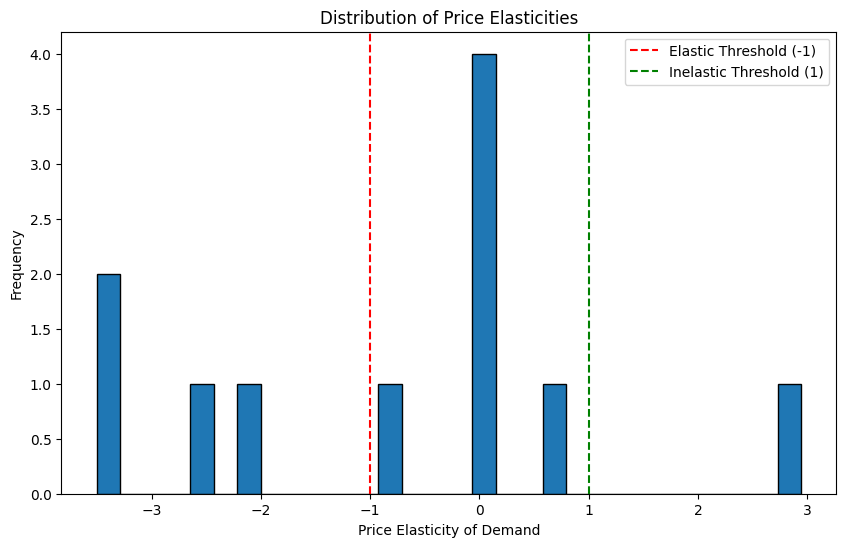

In [ ]:
import matplotlib.pyplot as plt

elasticity_df = pd.read_csv("elasticity_data.csv")

elasticity_df = elasticity_df[(elasticity_df["elasticity"] > -5) & (elasticity_df["elasticity"] < 5)]

plt.figure(figsize=(10,6))
plt.hist(elasticity_df["elasticity"], bins=30, edgecolor="black")
plt.xlabel("Price Elasticity of Demand")
plt.ylabel("Frequency")
plt.title("Distribution of Price Elasticities")
plt.axvline(x=-1, color="red", linestyle="dashed", label="Elastic Threshold (-1)")
plt.axvline(x=1, color="green", linestyle="dashed", label="Inelastic Threshold (1)")
plt.legend()
plt.show()
